In [1]:
import numpy as np
np.random.seed(40)
import matplotlib.pyplot as plt

In [2]:
class CliffWalk:
  def __init__(self):
    self.height = 4
    self.width = 12
    self.state_space = [(x,y) for x in range(self.height) for y in range(self.width)]
    self.action_space = [0,1,2,3]
    self.start_space = (3,0)
    self.goal_space = (3,11)
    self.state = self.start_space
    self.cliffs = [(3, y) for y in range(1, 11)]

  def reset(self):
    self.state = self.start_space
    return self.state

  def step(self, action):
    x = self.state[0]
    y = self.state[1]

    if action == 0:
      x = max(x-1,0)

    elif action == 1:
      x = min(x+1, self.height-1)

    elif action == 2:
      y = max(y-1,0)

    elif action == 3:
      y = min(y+1,self.width-1)

    self.state = (x, y)

    if self.state in self.cliffs:
      return (3,0), -1, False

    elif self.state == self.goal_space:
      return self.state, 0, True

    else:
      return self.state, -1, False

In [3]:
def argmax(arr):
  return np.random.choice([idx for idx in range(len(arr)) if arr[idx] == arr.max()])

In [11]:
import pandas as pd

class N_step_SARSA:
  def __init__(self, env, n, gamma = 1, epsilon = 0.1, alpha = 0.001):
    self.env = env
    self.n = n
    self.gamma = gamma
    self.epsilon = epsilon
    self.alpha = alpha
    self.q_table = {state: np.zeros(len(self.env.action_space)) for state in self.env.state_space}

  def epsilon_greedy(self,state):
    if np.random.rand() < self.epsilon:
      return np.random.choice(self.env.action_space)
    else:
      return np.argmax(self.q_table[state])

  def update_q(self, states, actions, rewards, t, T):

    G = 0
    gamma = self.gamma

    for i in range(t, min(t + self.n, T)):
      G += gamma*rewards[i]
      gamma *= self.gamma

    if (t + self.n) < T:
      G += gamma*self.q_table[states[t+self.n]][actions[t+self.n]]

    self.q_table[states[t]][actions[t]] += self.alpha*(G - self.q_table[states[t]][actions[t]])

  def control(self, episodes):

    time_steps = []
    for i in range(1, episodes+1):

      if i % int(episodes/10) == 0:
        print('Episode ', i, '/', episodes, ': ', '[', '*'*int(i/(episodes/10)), '-'*int((episodes - i)/(episodes/10)), ']')

      states, actions, rewards = [], [], []

      state = self.env.reset()
      action = self.epsilon_greedy(state)
      done = False

      states.append(state)
      actions.append(action)
      rewards.append(0)

      t = 0
      T = np.inf
      steps = 0

      while (not done):
        if t < T:
          next_state, reward, done = self.env.step(action)
          next_action = self.epsilon_greedy(next_state)
          steps += 1
          states.append(next_state)
          rewards.append(reward)
          actions.append(next_action)

          if done:
            T = t + 1
          else:
            action = next_action

          tau = t - self.n + 1
          if tau >= 0:
            self.update_q(states, actions, rewards, tau, T)

          if tau == T - 1:
            break

          t += 1
          steps += 1
      time_steps.append(steps)
    policy = {state: np.argmax(actions) for state, actions in self.q_table.items()}
    # return policy, self.q_table
    return policy, self.q_table, time_steps

In [5]:
env = CliffWalk()

SARSA_grid = N_step_SARSA(env, 5)

opt_policy, q_table,time_steps= SARSA_grid.control(10000)

Episode  1000 / 10000 :  [ * --------- ]
Episode  2000 / 10000 :  [ ** -------- ]
Episode  3000 / 10000 :  [ *** ------- ]
Episode  4000 / 10000 :  [ **** ------ ]
Episode  5000 / 10000 :  [ ***** ----- ]
Episode  6000 / 10000 :  [ ****** ---- ]
Episode  7000 / 10000 :  [ ******* --- ]
Episode  8000 / 10000 :  [ ******** -- ]
Episode  9000 / 10000 :  [ ********* - ]
Episode  10000 / 10000 :  [ **********  ]


In [6]:
policy = [[0 for _ in range(12)] for _ in range(4)]
cliffs = [(3, y) for y in range(1, 11)]
for state, action in opt_policy.items():
  if action == 0:
    policy[state[0]][state[1]] = '^'
  elif action == 1:
    policy[state[0]][state[1]] = 'v'
  elif action == 2:
    policy[state[0]][state[1]] = '<'
  elif action == 3:
    policy[state[0]][state[1]] = '>'

  if state == (3, 11):
    policy[state[0]][state[1]] = 'G'
  if state in cliffs:
    policy[state[0]][state[1]] = 'C'
policy

[['>', '>', '>', '>', '>', '>', '>', 'v', '>', '>', 'v', 'v'],
 ['>', '>', '>', '>', '>', '>', 'v', '>', 'v', '^', '>', 'v'],
 ['>', '>', '>', '>', '>', '>', '>', '>', '>', '>', '>', 'v'],
 ['^', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'G']]

In [12]:
n_values = [2, 5, 10]
results = {}
env = CliffWalk()
for n in n_values:
    SARSA_grid = N_step_SARSA(env, n)
    opt_policy, q_table,time_steps = SARSA_grid.control(episodes=10000)
    results[n] = time_steps


Episode  1000 / 10000 :  [ * --------- ]
Episode  2000 / 10000 :  [ ** -------- ]
Episode  3000 / 10000 :  [ *** ------- ]
Episode  4000 / 10000 :  [ **** ------ ]
Episode  5000 / 10000 :  [ ***** ----- ]
Episode  6000 / 10000 :  [ ****** ---- ]
Episode  7000 / 10000 :  [ ******* --- ]
Episode  8000 / 10000 :  [ ******** -- ]
Episode  9000 / 10000 :  [ ********* - ]
Episode  10000 / 10000 :  [ **********  ]
Episode  1000 / 10000 :  [ * --------- ]
Episode  2000 / 10000 :  [ ** -------- ]
Episode  3000 / 10000 :  [ *** ------- ]
Episode  4000 / 10000 :  [ **** ------ ]
Episode  5000 / 10000 :  [ ***** ----- ]
Episode  6000 / 10000 :  [ ****** ---- ]
Episode  7000 / 10000 :  [ ******* --- ]
Episode  8000 / 10000 :  [ ******** -- ]
Episode  9000 / 10000 :  [ ********* - ]
Episode  10000 / 10000 :  [ **********  ]
Episode  1000 / 10000 :  [ * --------- ]
Episode  2000 / 10000 :  [ ** -------- ]
Episode  3000 / 10000 :  [ *** ------- ]
Episode  4000 / 10000 :  [ **** ------ ]
Episode  5000 

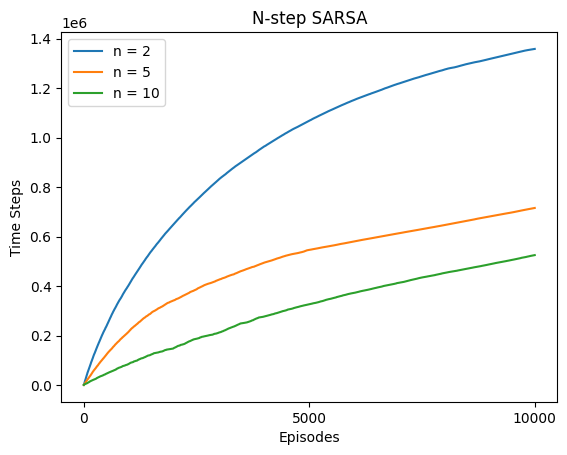

In [13]:
for n, steps in results.items():
    Timesteps = np.cumsum(steps)
    plt.plot(Timesteps, label=f'n = {n}')
plt.xticks(np.arange(0, 10001, 5000))
plt.xlabel('Episodes')
plt.ylabel('Time Steps')
plt.title('N-step SARSA')
plt.legend()
plt.show()